<a href="https://colab.research.google.com/github/Krishnadayal/Data-Science-Project-Lifecycle/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
upload = files.upload()

Saving train_data (2).csv to train_data (2).csv


In [ ]:
train_data = pd.read_csv("/content/train_data (2).csv")
train_data.head()

,customer_id,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
train_data.dtypes

,0
customer_id,float64
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_category,int64


In [ ]:
train_data["cluster_category"] = train_data["cluster_category"].astype(str)
train_data["customer_id"] = train_data["customer_id"].astype(str)

In [ ]:
train_data.dtypes

,0
customer_id,object
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_category,object


In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train_data['cluster_category'], train_data['outlet_city'])
print(contingency_table)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2}, p-value: {p}")

outlet_city       Batticaloa  Colombo  Dehiwala-Mount Lavinia  Galle  Gampaha  \
cluster_category                                                                
1                      18960    19023                       1  19034    18763   
2                          2        0                   15648      2        1   
3                       4901     4959                       0   4932     4833   
4                          0        3                   17283      1        0   
5                          2        2                    3902      3        1   
6                      17147    17046                       4  17037    16654   

outlet_city       Homagama  Jaffna  Kaduwela  Kalmunai  Kandy  Katunayake  \
cluster_category                                                            
1                        2   18821         1     18853  18898       19080   
2                    15464       2     15478         3      0           2   
3                        0    4906         

In [ ]:
!pip install category-encoders

from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols = ["outlet_city"])
train_data = encoder.fit_transform(train_data)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
train_data.drop(["customer_id"], axis = 1, inplace = True)
train_data

,outlet_city_0,outlet_city_1,outlet_city_2,outlet_city_3,outlet_city_4,luxury_sales,fresh_sales,dry_sales,cluster_category
0,0,0,0,0,1,1209.60,756.00,5292.00,4
1,0,0,0,1,0,1590.12,1060.08,6007.12,1
2,0,0,0,1,1,2288.88,1481.04,9155.52,4
3,0,0,0,1,1,2274.94,1739.66,9099.76,4
4,0,0,0,0,1,2345.49,2069.55,9243.99,4
...,...,...,...,...,...,...,...,...,...
774144,0,1,1,1,0,3893.40,3893.40,3448.44,3
774145,1,0,0,0,1,6095.86,5557.99,6275.15,3
774146,0,1,1,0,0,5121.42,4820.16,4669.53,3
774147,1,0,1,0,0,6311.76,6311.76,5940.48,3


In [ ]:
x = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

In [ ]:
print(x)
print(f"x instances: {x.shape}")

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
0                   0              0              0              0   
1                   0              0              0              1   
2                   0              0              0              1   
3                   0              0              0              1   
4                   0              0              0              0   
...               ...            ...            ...            ...   
774144              0              1              1              1   
774145              1              0              0              0   
774146              0              1              1              0   
774147              1              0              1              0   
774148              1              0              0              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
0                   1       1209.60       756.00    5292.00  
1                   0       1590.12

In [ ]:
print(y)
print(f"y instances: {y.shape}")

0         4
1         1
2         4
3         4
4         4
         ..
774144    3
774145    3
774146    3
774147    3
774148    3
Name: cluster_category, Length: 774149, dtype: object
y instances: (774149,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
print(x_train)
print(f"x_train instances: {x_train.shape}")

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
463937              1              0              0              0   
679105              0              1              1              1   
580470              1              0              0              1   
191025              0              0              1              0   
579852              1              0              0              1   
...               ...            ...            ...            ...   
129048              0              0              0              0   
645520              0              1              1              1   
359113              0              0              0              1   
706700              0              1              0              1   
625066              0              1              0              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
463937              0       1775.67      2185.44    9424.71  
679105              1       2650.31

In [ ]:
print(x_test)
print(f"x_test instances: {x_test.shape}")

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
552538              1              0              0              1   
271541              0              0              0              1   
627747              1              0              0              0   
585862              0              1              1              0   
198022              0              1              0              1   
...               ...            ...            ...            ...   
272608              0              0              0              0   
570070              1              0              0              1   
87355               0              0              1              1   
527660              1              0              0              1   
715671              0              1              1              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
552538              1       2116.32      2821.76   11639.76  
271541              1        904.26

In [ ]:
print(y_train)
print(f"y_train instances: {y_train.shape}")

463937    1
679105    6
580470    6
191025    2
579852    6
         ..
129048    4
645520    6
359113    5
706700    6
625066    6
Name: cluster_category, Length: 619319, dtype: object
y_train instances: (619319,)


In [ ]:
print(y_test)
print(f"y_test instances: {y_test.shape}")

552538    1
271541    2
627747    6
585862    6
198022    2
         ..
272608    2
570070    6
87355     4
527660    1
715671    6
Name: cluster_category, Length: 154830, dtype: object
y_test instances: (154830,)


In [ ]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
x_train.iloc[:,5:8] = rc.fit_transform(x_train.iloc[:,5:8])
x_test.iloc[:,5:8] = rc.transform(x_test.iloc[:,5:8])

In [ ]:
print(x_train)

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
463937              1              0              0              0   
679105              0              1              1              1   
580470              1              0              0              1   
191025              0              0              1              0   
579852              1              0              0              1   
...               ...            ...            ...            ...   
129048              0              0              0              0   
645520              0              1              1              1   
359113              0              0              0              1   
706700              0              1              0              1   
625066              0              1              0              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
463937              0      0.053296    -0.231634   1.060226  
679105              1      0.830602

In [ ]:
print(x_test)

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
552538              1              0              0              1   
271541              0              0              0              1   
627747              1              0              0              0   
585862              0              1              1              0   
198022              0              1              0              1   
...               ...            ...            ...            ...   
272608              0              0              0              0   
570070              1              0              0              1   
87355               0              0              1              1   
527660              1              0              0              1   
715671              0              1              1              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
552538              1      0.356037    -0.105623   1.472437  
271541              1     -0.721139

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 1, weights = "uniform")
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=32, p=1)

In [ ]:
'''
print(classifier.predict(rc.transform([[1209.60, 756.00, 5292.00]])))
'''

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but KNeighborsClassifier is expecting 8 features as input.

In [ ]:
y_pred = classifier.predict(x_test)
comparision = pd.DataFrame({"Actual Cluster Category":y_test, "Predicted Cluster Category":y_pred})
comparision.head(10)

,Actual Cluster Category,Predicted Cluster Category
552538,1,1
271541,2,2
627747,6,6
585862,6,6
198022,2,2
71665,4,4
320960,2,2
45959,4,4
226794,2,2
608419,6,6


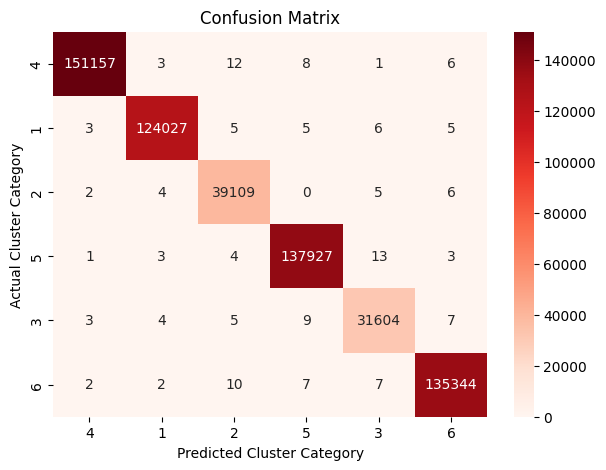

KNN Train Model Accuracy: 0.9997561838083443


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
x_pred = classifier.predict(x_train)

cm_train = confusion_matrix(y_train, x_pred)
labels = train_data["cluster_category"].unique()

plt.figure(figsize = (7,5))
sns.heatmap(cm_train, annot = True, fmt = "d", cmap = "Reds", xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted Cluster Category")
plt.ylabel("Actual Cluster Category")
plt.title("Confusion Matrix")
plt.show()

print(f"KNN Train Model Accuracy: {accuracy_score(y_train, x_pred)}")

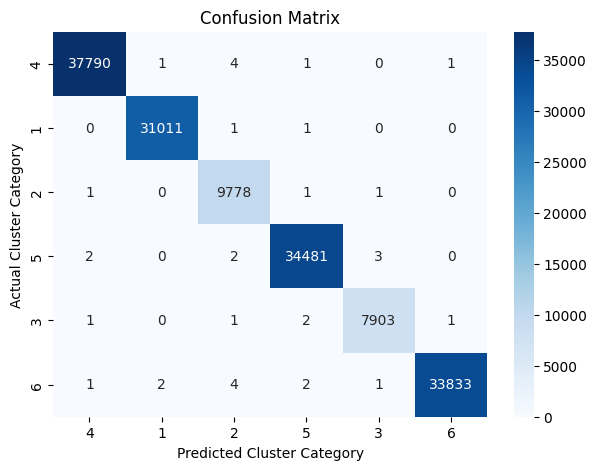

KNN Test Model Accuracy: 0.9997804043144094


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_test = confusion_matrix(y_test, y_pred)
labels = train_data["cluster_category"].unique()

plt.figure(figsize = (7,5))
sns.heatmap(cm_test, annot = True, fmt = "d", cmap = "Blues", xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted Cluster Category")
plt.ylabel("Actual Cluster Category")
plt.title("Confusion Matrix")
plt.show()

print(f"KNN Test Model Accuracy: {accuracy_score(y_test, y_pred)}")

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))
print("Total Error: {:.2f}%".format((1 - accuracies).mean()*100))

Accuracy: 99.98%
Standard Deviation: 0.01%
Total Error: 0.02%


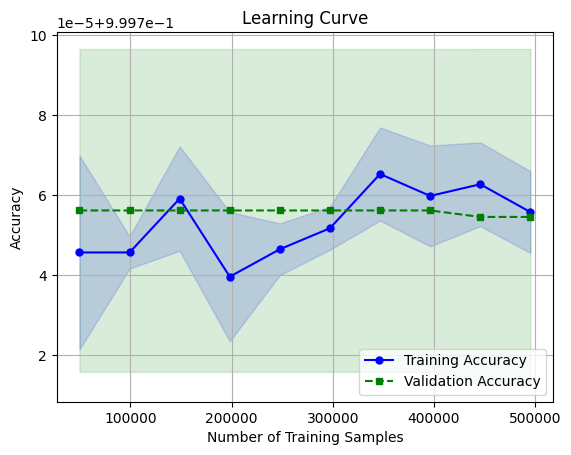

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    estimator=classifier,  # Your KNN classifier object
    X=x_train,  # Training data features
    y=y_train,  # Training data labels
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Evaluation metric
    train_sizes=np.linspace(0.1, 1.0, 10),  # Training set sizes to consider
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
hyper_parameters = [{"n_neighbors":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                    "weights":["uniform", "distance"],
                    "p":[1,2]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = hyper_parameters,
                           scoring = "accuracy",
                           cv = 10)

grid_search.fit(x_train,y_train)
best_accuracy = grid_search.best_score_
best_hyper_parameters = grid_search.best_params_

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Hyper Parameters: {best_hyper_parameters}")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37797
           2       1.00      1.00      1.00     31013
           3       1.00      1.00      1.00      9781
           4       1.00      1.00      1.00     34488
           5       1.00      1.00      1.00      7908
           6       1.00      1.00      1.00     33843

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



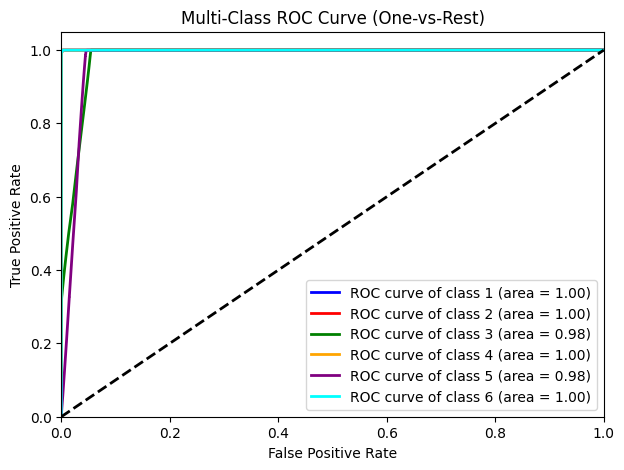

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

y_test_bin = label_binarize(y_test, classes = classifier.classes_)
n_classes = y_test_bin.shape[1]

classifier_ovr = OneVsRestClassifier(classifier)
classifier_ovr.fit(x_train, y_train)

y_score = classifier_ovr.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize = (7, 5))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classifier.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (One-vs-Rest)')
plt.legend(loc = "lower right")
plt.show()